# Question
1. Do histogram equalization on pout-dark and display the same 
 2. Do histogram matching (specification) on the pout-dark image, keeping pout-bright
as a reference image.

# Solution

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Histogram Equalization

Image size: (258, 221, 3)


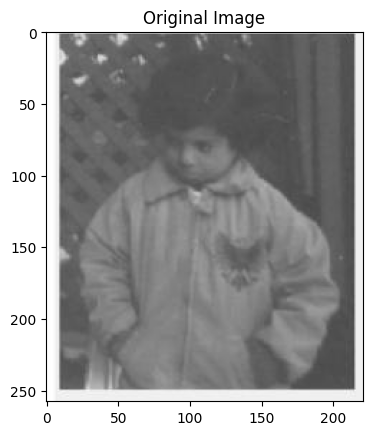

In [24]:
pout_dark = cv2.imread('pout-dark.jpg')
pout_dark = cv2.cvtColor(pout_dark, cv2.COLOR_BGR2RGB)
#Display Image
plt.imshow(pout_dark)
plt.title('Original Image')
print(f'Image size: {pout_dark.shape}')

Text(0.5, 1.0, 'Histogram Equalized Image')

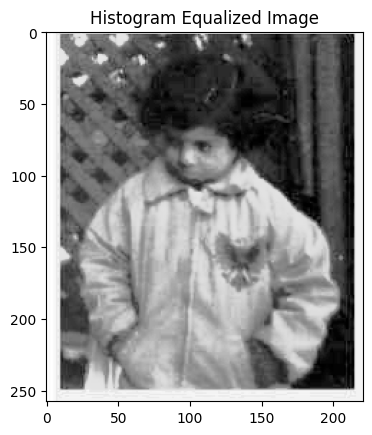

In [26]:
pout_dark_np = np.array(pout_dark)

height, width, channels = pout_dark.shape
count = [0] * 256

for i in range(height):
    for j in range(width):
        for k in range(channels):
            count[pout_dark[i][j][k]] += 1
            
prob_np = np.array(count) / (height*width*channels)
cdf = np.cumsum(prob_np)
cdf_normalized = (255 * cdf).astype(np.uint8)

new_img = np.zeros_like(pout_dark, dtype=np.uint8)

for i in range(height):
    for j in range(width):
        for k in range(channels):
            new_img[i][j][k] = cdf_normalized[pout_dark[i][j][k]]

plt.imshow(new_img)
plt.title('Histogram Equalized Image')

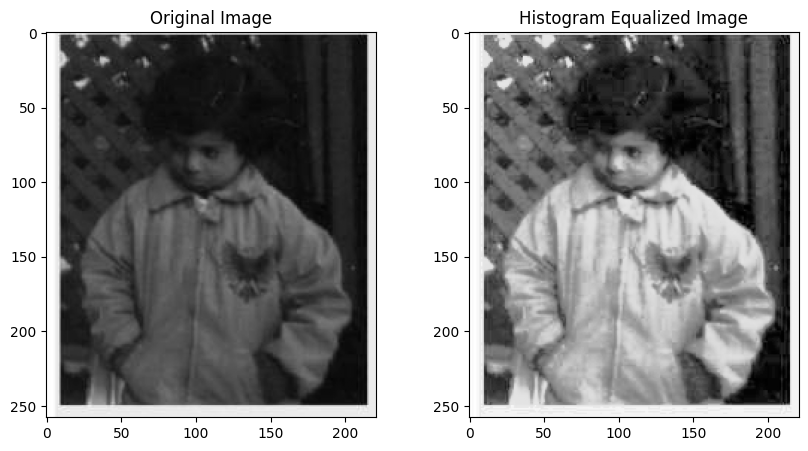

In [32]:
pout_dark = cv2.imread('pout-dark.jpg', cv2.IMREAD_GRAYSCALE)

equalized_img = cv2.equalizeHist(pout_dark)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(pout_dark, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Histogram Equalized Image')

plt.show()

## Histogram Matching

Text(0.5, 1.0, 'Original Image')

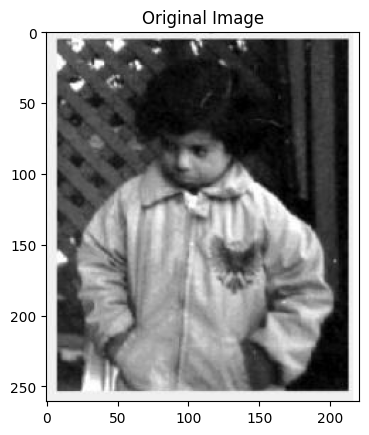

In [33]:
pout_dark = cv2.imread('pout-dark.jpg')
pout_dark = cv2.cvtColor(pout_dark, cv2.COLOR_BGR2RGB)
pout_bright = cv2.imread('pout-bright.jpg')
pout_bright = cv2.cvtColor(pout_bright, cv2.COLOR_BGR2RGB)
pout_dark_np = np.array(pout_bright)

plt.imshow(pout_bright)
plt.title('Original Image')

Text(0.5, 1.0, 'Histogram Equalized Image')

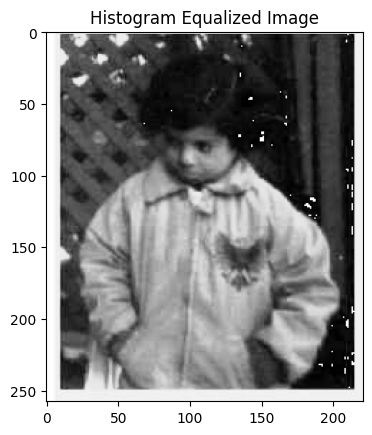

In [34]:
count_dark = [0] * 256
count_bright = [0] * 256

for i in range(height):
    for j in range(width):
        for k in range(channels):
            count_dark[pout_dark[i][j][k]] += 1
            count_bright[pout_bright[i][j][k]] += 1
            
prob_dark_np = np.array(count_dark) / (height*width*channels)
cdf_dark = np.cumsum(prob_dark_np)
cdf_dark_normalized = (255 * cdf_dark).astype(np.uint8)

prob_bright_np = np.array(count_bright) / (height*width*channels)
cdf_bright = np.cumsum(prob_bright_np)
cdf_bright_normalized = (255 * cdf_bright).astype(np.uint8)

mapping = np.zeros(256, dtype=np.uint8)
for i in range(256):
    closest_value = np.argmin(np.abs(cdf_dark_normalized[i] - cdf_bright_normalized))
    mapping[i] = closest_value
    
new_img = np.zeros_like(pout_dark, dtype=np.uint8)

for i in range(height):
    for j in range(width):
        for k in range(channels):
            new_img[i][j][k] = mapping[pout_dark[i][j][k]]

plt.imshow(new_img)
plt.title('Histogram Equalized Image')

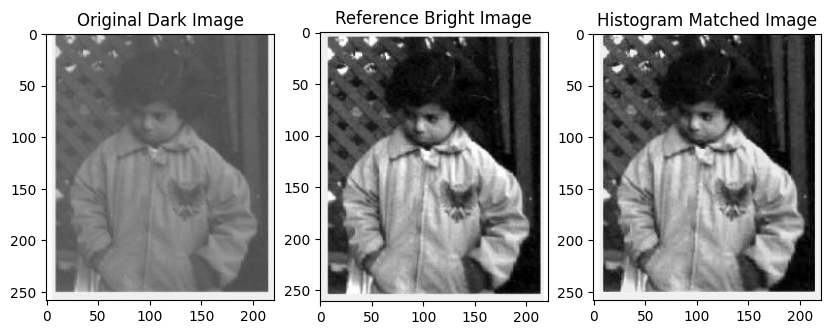

In [35]:
def hist_match(source, reference):
    src_gray = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    ref_gray = cv2.cvtColor(reference, cv2.COLOR_BGR2GRAY)

    src_hist, _ = np.histogram(src_gray.flatten(), 256, [0, 256])
    ref_hist, _ = np.histogram(ref_gray.flatten(), 256, [0, 256])

    src_cdf = np.cumsum(src_hist).astype(np.float32)
    ref_cdf = np.cumsum(ref_hist).astype(np.float32)

    src_cdf = src_cdf / src_cdf[-1]
    ref_cdf = ref_cdf / ref_cdf[-1]

    mapping = np.interp(src_cdf, ref_cdf, np.arange(256))

    matched = np.interp(src_gray.flatten(), np.arange(256), mapping)
    matched = matched.reshape(src_gray.shape).astype(np.uint8)

    return matched

source_img = cv2.imread('pout-dark.jpg')  # Dark Image
reference_img = cv2.imread('pout-bright.jpg')  # Bright Image

matched_img = hist_match(source_img, reference_img)

plt.figure(figsize=(10,5))

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
plt.title('Original Dark Image')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(reference_img, cv2.COLOR_BGR2RGB))
plt.title('Reference Bright Image')

plt.subplot(1,3,3)
plt.imshow(matched_img, cmap='gray')
plt.title('Histogram Matched Image')

plt.show()